In [1]:
import numpy as np 
import pandas as pd
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
def Min_Max_normalization(name):
    name = name.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(name)
    sc = scaler.transform(name)
    return sc.reshape(-1)
open_p  = Min_Max_normalization(df['開盤價'].values)
max_p = Min_Max_normalization(df['最高價'].values)
min_p = Min_Max_normalization(df['最低價'].values)
fin_p = Min_Max_normalization(df['收盤價'].values)
len_p = np.array([int(i.replace(',','')) for i in df['成交筆數'].values])
len_p = Min_Max_normalization(len_p)

In [41]:
data = []
tmp = []
label = []
for cnt in range(len(open_p)-11):
    open_10 = open_p[cnt:cnt+10]
    max_10 = max_p[cnt:cnt+10]
    min_10 = min_p[cnt:cnt+10]
    fin_10 = fin_p[cnt:cnt+10]
    len_10 = len_p[cnt:cnt+10]
    for i,j,k,m,n in zip(open_10,max_10,min_10,fin_10,len_10):
        tmp.append([i, j, k, m, n])
    data.append(tmp)
    tmp = []
    label.append(fin_p[cnt+11:cnt+12][0])
        
split_cnt = int(len(data)*0.8)
x_train,y_train = np.array(data[0:split_cnt]),np.array(label[0:split_cnt])
x_test,y_test = np.array(data[0:len(data)-split_cnt]),np.array(label[0:len(data)-split_cnt])

In [25]:
y_train.shape

(2488,)

In [33]:
model= Sequential()
model.add(LSTM(128,input_shape=(10, 5),return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(1))

In [34]:
model.compile(loss='mean_squared_error',optimizer='adam')
# 開始訓練model batch_size一次丟多少資料進去訓練 epochs總共要訓練幾次
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
39/39 [==============================] - 0s 12ms/step - loss: 0.0057 - val_loss: 2.7088e-04
Epoch 2/10
39/39 [==============================] - 0s 8ms/step - loss: 1.0127e-04 - val_loss: 1.7208e-05
Epoch 3/10
39/39 [==============================] - 0s 8ms/step - loss: 6.4788e-05 - val_loss: 1.1904e-05
Epoch 4/10
39/39 [==============================] - 0s 8ms/step - loss: 6.5802e-05 - val_loss: 1.2511e-05
Epoch 5/10
39/39 [==============================] - 0s 8ms/step - loss: 6.3889e-05 - val_loss: 9.4502e-06
Epoch 6/10
39/39 [==============================] - 0s 8ms/step - loss: 6.3981e-05 - val_loss: 9.4722e-06
Epoch 7/10
39/39 [==============================] - 0s 8ms/step - loss: 6.3578e-05 - val_loss: 1.2683e-05
Epoch 8/10
39/39 [==============================] - 0s 8ms/step - loss: 6.1021e-05 - val_loss: 1.2174e-05
Epoch 9/10
39/39 [==============================] - 0s 8ms/step - loss: 6.1389e-05 - val_loss: 1.4983e-05
Epoch 10/10
39/39 [==============================

In [37]:
predict_result = model.predict(np.array(x_test)
predict_result

SyntaxError: invalid syntax (2717571304.py, line 2)

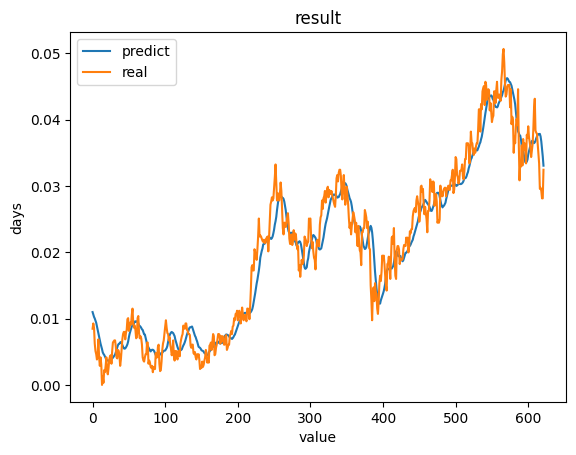

In [44]:
y_predicted = model.predict(x_test)
#預測
plt.plot(y_predicted)
#實際值
plt.plot(y_test)
#標題
plt.title('result')
#y軸標籤
plt.ylabel('days')
#x軸標籤
plt.xlabel('value')
#顯示折線的名稱
plt.legend(['predict', 'real'], loc='upper left')
#顯示折線圖
plt.show()